In [ ]:
# General
import numpy as np
import pandas as pd
import codecs
import seaborn as sns

# sklearn
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
# Measuring metrics
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('snappfood.csv')

df.drop_duplicates(subset='review', keep='first', inplace=True)
df.dropna(subset='review', inplace=True)
df = df.dropna(subset=['sentiment'])
df = df[['review', 'sentiment']]
df.reset_index(drop=True, inplace=True)
df

,review,sentiment
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,negative
1,قرار بود 1 ساعته برسه ولی نیم ساعت زودتر از مو...,positive
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,negative
3,عالی بود همه چه درست و به اندازه و کیفیت خوب، ...,positive
4,شیرینی وانیلی فقط یک مدل بود,positive
...,...,...
69116,سلام من به فاکتور غذاهایی که سفارش میدم احتیاج...,negative
69117,سایز پیتزا نسبت به سفارشاتی که قبلا گذشتم کم ش...,negative
69118,من قارچ اضافه رو اضافه کرده بودم بودم اما اگر ...,positive
69119,همرو بعد 2ساعت تاخیر اشتباه آوردن پولشم رفت رو...,negative


In [ ]:
# Split the dataset into features (X) and target labels (y)
x_data = df['review']
y_data = df['sentiment']

# Convert sentiment labels to binary (0 for negative, 1 for positive)
y_data = y_data.apply(lambda x: 1 if x == 'positive' else 0)  # <-- make sure to match the actual positive string label in CSV

# You might want to split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)  # 20% for testing


In [ ]:


# the given threshold. This value is also called cut-off in the literature.
min_df = 1


# Tokenize function used in Vectorizer
def tokenize(text):
    return word_tokenize(text)

In [ ]:
models = {
    'Naive Bayes': Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf', MultinomialNB())
    ]),
    'Linear SVC': Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf-svm', LinearSVC(max_iter=5000))
    ]),
    'SGD': Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf-sgd', SGDClassifier(max_iter=5000))
    ]),
    'Random Forest': Pipeline([
        ('vect', CountVectorizer(ngram_range=(1, 2))),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf-rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

In [ ]:
# Utility function to evaluate models
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'\n{name} Model:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print('-' * 80)

    return y_pred


In [ ]:
# Evaluate each model and print the performance
predictions = {}
for name, model in models.items():
    print(f'Evaluating {name}...')
    y_pred = evaluate_model(name, model, x_train, y_train, x_test, y_test)
    predictions[name] = y_pred

Evaluating Naive Bayes...

Naive Bayes Model:
Accuracy: 0.8571
Precision: 0.9192
Recall: 0.7832
F1 Score: 0.8458

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      6907
           1       0.92      0.78      0.85      6918

    accuracy                           0.86     13825
   macro avg       0.87      0.86      0.86     13825
weighted avg       0.87      0.86      0.86     13825

--------------------------------------------------------------------------------
Evaluating Linear SVC...

Linear SVC Model:
Accuracy: 0.8610
Precision: 0.8910
Recall: 0.8228
F1 Score: 0.8556

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6907
           1       0.89      0.82      0.86      6918

    accuracy                           0.86     13825
   macro avg       0.86      0.86      0.86     13825
weighted avg       0.86      0.86      0.86     

In [ ]:
model_metrics = {}  # Collect metrics for visualization

def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    model_metrics[name] = {
        'Accuracy' : accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall'   : recall_score(y_test, y_pred),
        'F1 Score' : f1_score(y_test, y_pred)
    }
    print(f'\n{name} Model Evaluation Metrics:')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

for name, model in models.items():
    evaluate_model(name, model, x_train, y_train, x_test, y_test)



Naive Bayes Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      6907
           1       0.92      0.78      0.85      6918

    accuracy                           0.86     13825
   macro avg       0.87      0.86      0.86     13825
weighted avg       0.87      0.86      0.86     13825

------------------------------------------------------------

Linear SVC Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6907
           1       0.89      0.82      0.86      6918

    accuracy                           0.86     13825
   macro avg       0.86      0.86      0.86     13825
weighted avg       0.86      0.86      0.86     13825

------------------------------------------------------------

SGD Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      6907
       

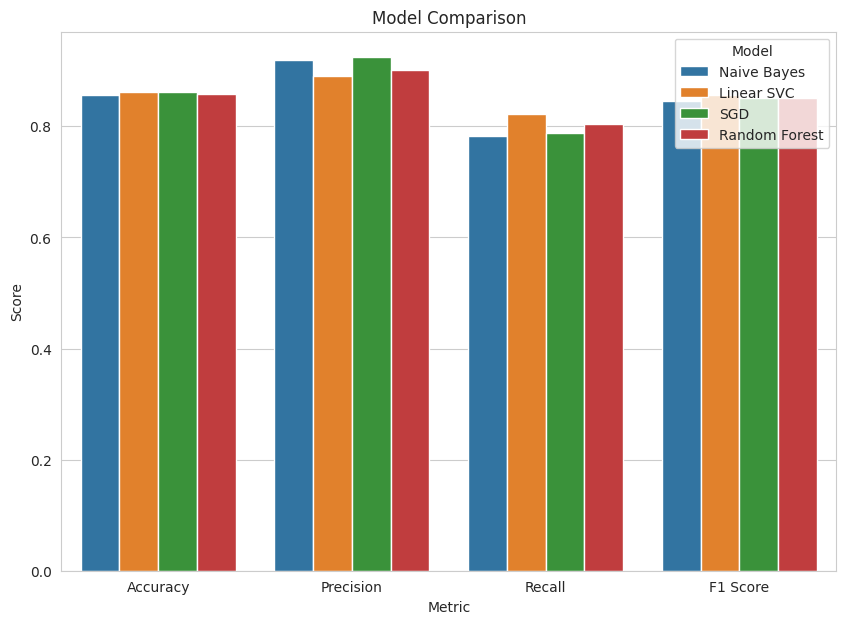

In [ ]:
# Plotting function:
def plot_model_metrics(metrics):
    sns.set_style("whitegrid")
    metrics_df = pd.DataFrame(metrics).T.reset_index()
    metrics_df.rename(columns={'index': 'Model'}, inplace=True)
    melted_df = pd.melt(metrics_df, id_vars="Model", var_name="Metric", value_name="Score")

    plt.figure(figsize=(10, 7))
    sns.barplot(x='Metric', y='Score', hue='Model', data=melted_df)
    plt.title('Model Comparison')
    plt.legend(title='Model')
    plt.show()

# Call the plot function with the collected metrics
plot_model_metrics(model_metrics)

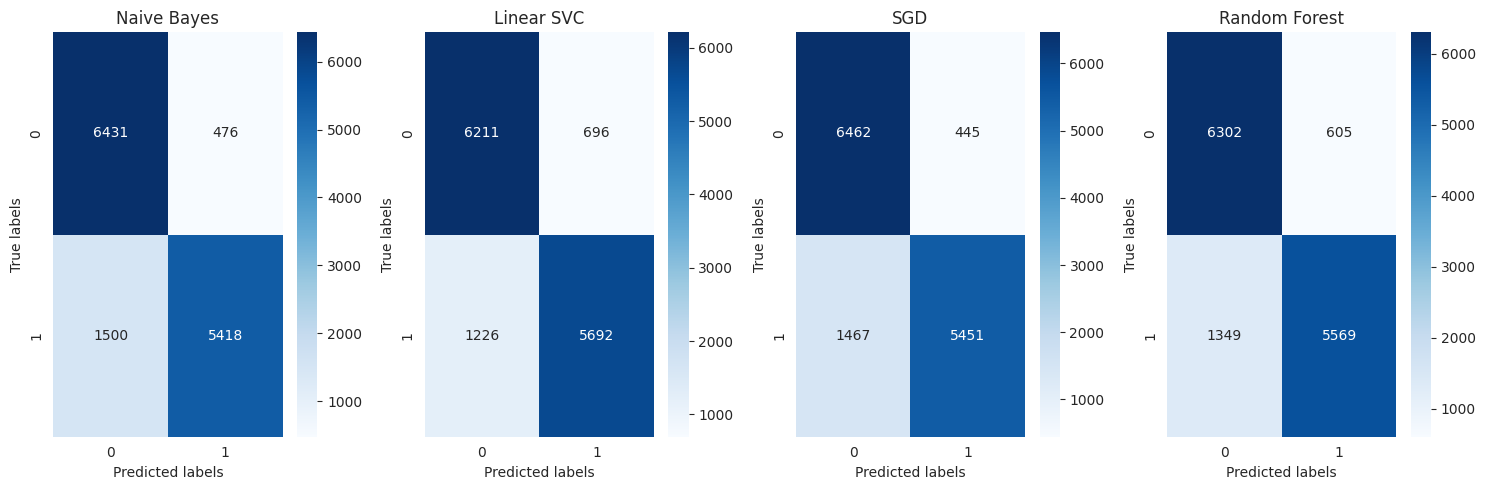

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix_heatmap(models, predictions, y_test):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

    for ax, (name, y_pred) in zip(axes.flatten(), predictions.items()):
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'{name}')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix_heatmap(models, predictions, y_test)

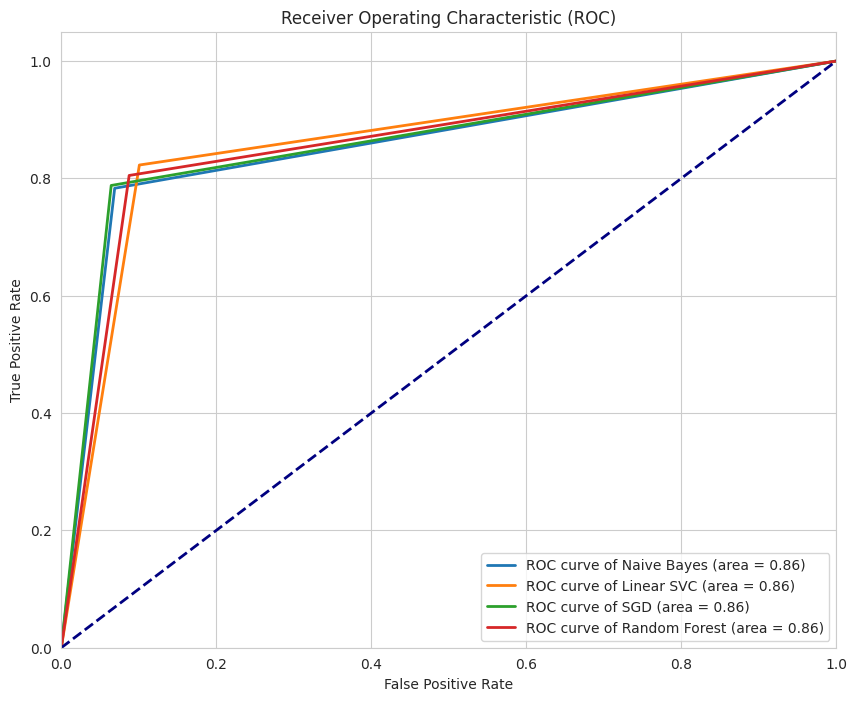

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, predictions, y_test):
    plt.figure(figsize=(10, 8))
    lw = 2

    for name, y_pred in predictions.items():
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=lw, label=f'ROC curve of {name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(models, predictions, y_test)

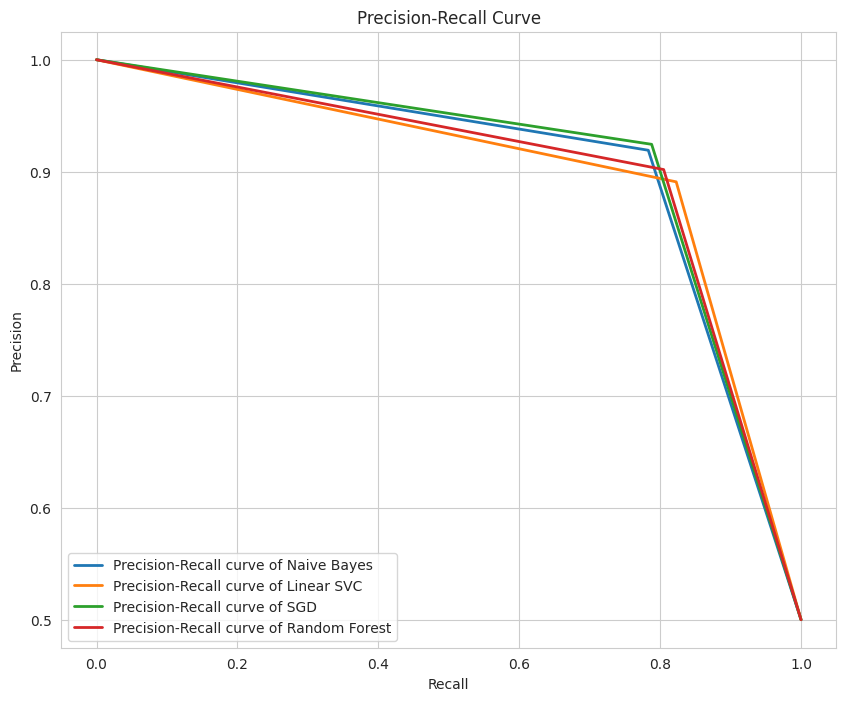

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(models, predictions, y_test):
    plt.figure(figsize=(10, 8))
    lw = 2

    for name, y_pred in predictions.items():
        precision, recall, _ = precision_recall_curve(y_test, y_pred)

        plt.plot(recall, precision, lw=lw, label=f'Precision-Recall curve of {name}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

plot_precision_recall_curve(models, predictions, y_test)

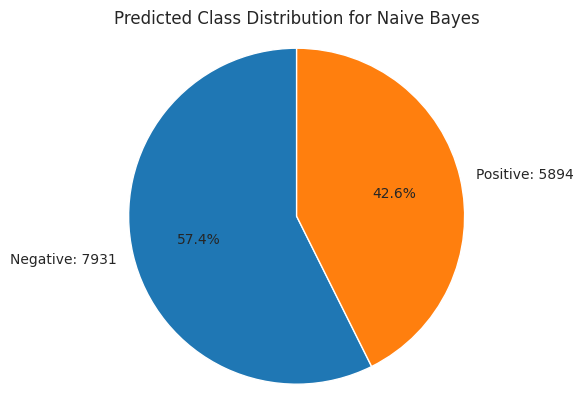

In [ ]:
def plot_prediction_distribution(y_pred, model_name, classes):
    class_distribution = np.bincount(y_pred)
    class_labels = [f'{classes[i]}: {n}' for i, n in enumerate(class_distribution)]

    fig, ax = plt.subplots()
    ax.pie(class_distribution, labels=class_labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Predicted Class Distribution for {model_name}')
    plt.show()

# Assuming you want to plot this for the Naive Bayes model
naive_bayes_pred = predictions['Naive Bayes']
plot_prediction_distribution(naive_bayes_pred, 'Naive Bayes', classes=['Negative', 'Positive'])

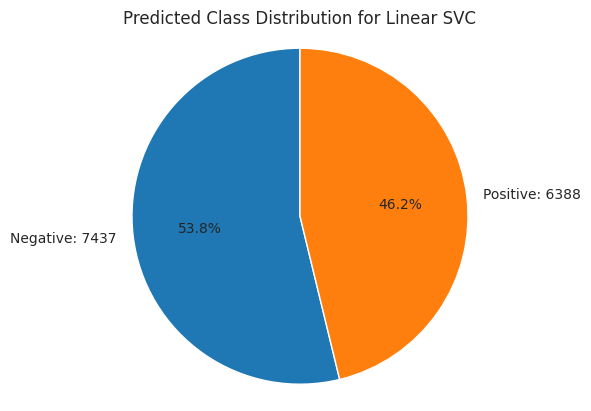

In [ ]:
def plot_prediction_distribution(y_pred, model_name, classes):
    class_distribution = np.bincount(y_pred)
    class_labels = [f'{classes[i]}: {n}' for i, n in enumerate(class_distribution)]

    fig, ax = plt.subplots()
    ax.pie(class_distribution, labels=class_labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Predicted Class Distribution for {model_name}')
    plt.show()

# Assuming you want to plot this for the Linear SVC model
naive_bayes_pred = predictions['Linear SVC']
plot_prediction_distribution(naive_bayes_pred, 'Linear SVC', classes=['Negative', 'Positive'])

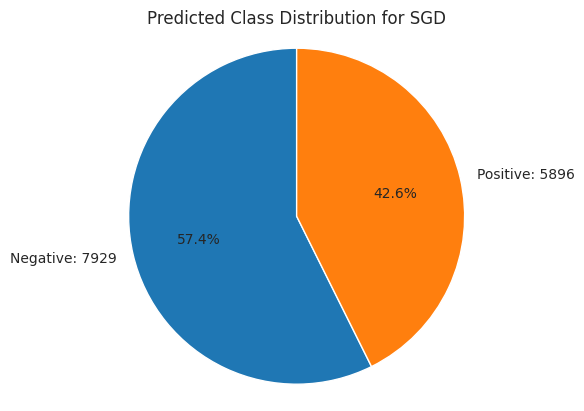

In [ ]:
def plot_prediction_distribution(y_pred, model_name, classes):
    class_distribution = np.bincount(y_pred)
    class_labels = [f'{classes[i]}: {n}' for i, n in enumerate(class_distribution)]

    fig, ax = plt.subplots()
    ax.pie(class_distribution, labels=class_labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Predicted Class Distribution for {model_name}')
    plt.show()

# Assuming you want to plot this for the SGD model
naive_bayes_pred = predictions['SGD']
plot_prediction_distribution(naive_bayes_pred, 'SGD', classes=['Negative', 'Positive'])

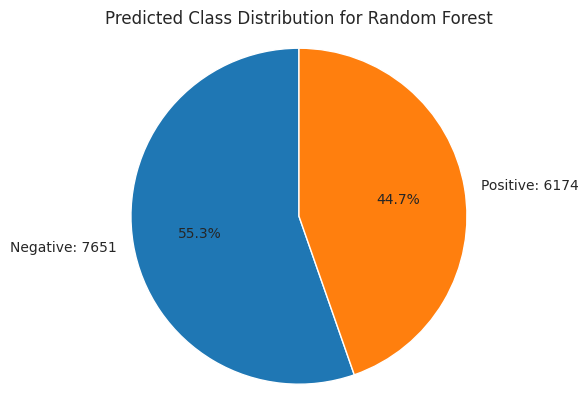

In [ ]:
def plot_prediction_distribution(y_pred, model_name, classes):
    class_distribution = np.bincount(y_pred)
    class_labels = [f'{classes[i]}: {n}' for i, n in enumerate(class_distribution)]

    fig, ax = plt.subplots()
    ax.pie(class_distribution, labels=class_labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Predicted Class Distribution for {model_name}')
    plt.show()

# Assuming you want to plot this for the Random Forest model
naive_bayes_pred = predictions['Random Forest']
plot_prediction_distribution(naive_bayes_pred, 'Random Forest', classes=['Negative', 'Positive'])